# Data Visualization for High School Grades Per Semester

## Introduction

This project created data visualizations about an Oregon high school for an upcoming school board presentation. The data was high school grades for each class per semester for three consecutive school years.

# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading, Exploring, & Cleaning Course Grade Data

In [6]:
df = pd.read_excel('SHVA Active and Inactive Final - Copy.xlsx') 

In [7]:
df.head()

,Grade,School Year,Semester 1,Semester 2
0,9,2024 - 2025,NP,NaN
1,9,2024 - 2025,NG,NaN
2,9,2024 - 2025,F,NaN
3,9,2024 - 2025,I,NaN
4,9,2024 - 2025,NG,NaN


In [8]:
df['Semester 1'].unique()

array(['NP', 'NG', 'F', 'I', 'P', 'C', 'D', 'B', 'A', nan, '*', 'WF'],
      dtype=object)

In [10]:
# Define passing and not passing grades
passing_grades = {'A', 'B', 'C', 'D', 'P'}
not_passing_grades = {'F', 'I', 'NP', 'NG', 'WF', '*'}

# Function to classify grades
def classify_grade(grade):
    if pd.isna(grade) or str(grade).strip() == "":  # If NaN or empty, return None
        return None  
    elif str(grade).strip() in passing_grades:
        return "Passing"
    else:
        return "Not Passing"

# Apply classification to Semester 1 & Semester 2
df["Semester 1 Status"] = df["Semester 1"].apply(classify_grade)
df["Semester 2 Status"] = df["Semester 2"].apply(classify_grade)

# Drop rows where both Semester 1 and Semester 2 are NaN (meaning the student didn't take any class)
df = df.dropna(subset=["Semester 1 Status", "Semester 2 Status"], how="all")

# Reshape data for visualization
df_long = df.melt(id_vars=["Grade", "School Year"], 
                  value_vars=["Semester 1 Status", "Semester 2 Status"], 
                  var_name="Semester", value_name="Status")

# Remove rows where Status is NaN (i.e., no class was taken that semester)
df_long = df_long.dropna(subset=["Status"])

# Count passing vs not passing per school year
school_summary = df_long.groupby(["School Year", "Status"]).size().unstack(fill_value=0)

## Data Visualization for Presentation

<Figure size 1000x500 with 0 Axes>

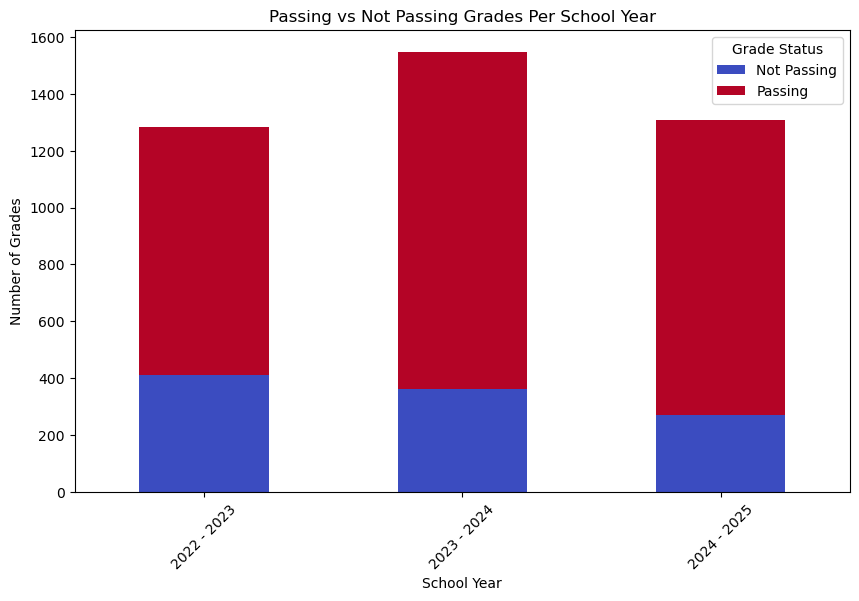

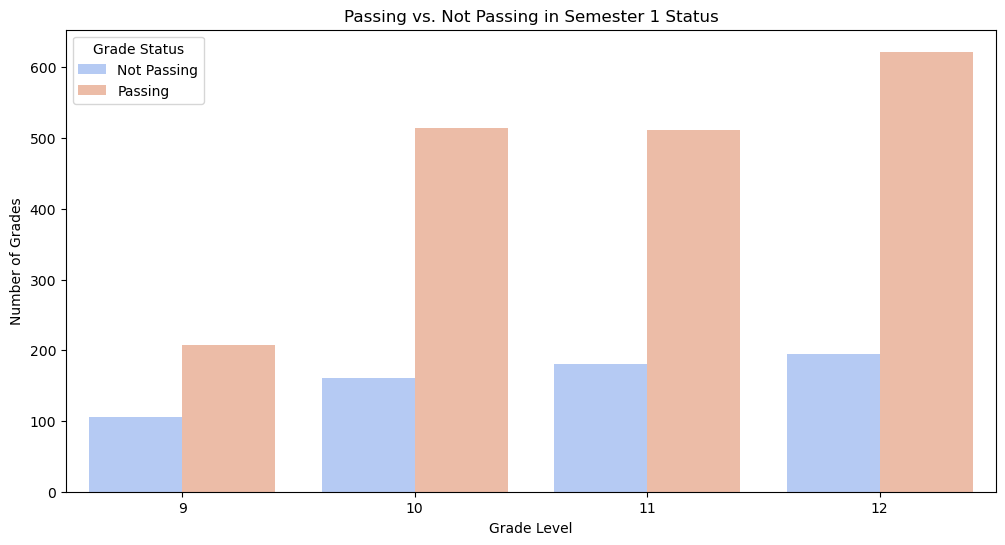

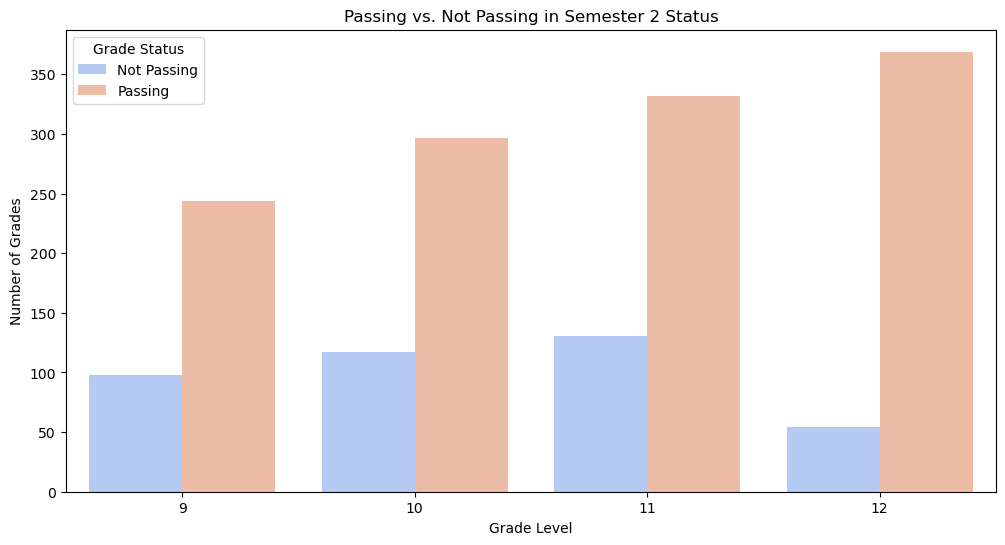

In [11]:
# Plot Overall Passing vs. Not Passing Per School Year
plt.figure(figsize=(10, 5))
school_summary.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(10, 6))
plt.title("Passing vs Not Passing Grades Per School Year")
plt.ylabel("Number of Grades")
plt.xlabel("School Year")
plt.xticks(rotation=45)
plt.legend(title="Grade Status")
plt.show()

# Count passing vs not passing per grade level per semester
grade_summary = df_long.groupby(["School Year", "Grade", "Semester", "Status"]).size().unstack(fill_value=0)

# Plot Semester 1 & 2 breakdown by Grade Level
for semester in ["Semester 1 Status", "Semester 2 Status"]:
    plt.figure(figsize=(12, 6))
    temp_df = df_long[df_long["Semester"] == semester]
    sns.countplot(data=temp_df, x="Grade", hue="Status", palette="coolwarm")
    plt.title(f"Passing vs. Not Passing in {semester}")
    plt.ylabel("Number of Grades")
    plt.xlabel("Grade Level")
    plt.legend(title="Grade Status")
    plt.show()


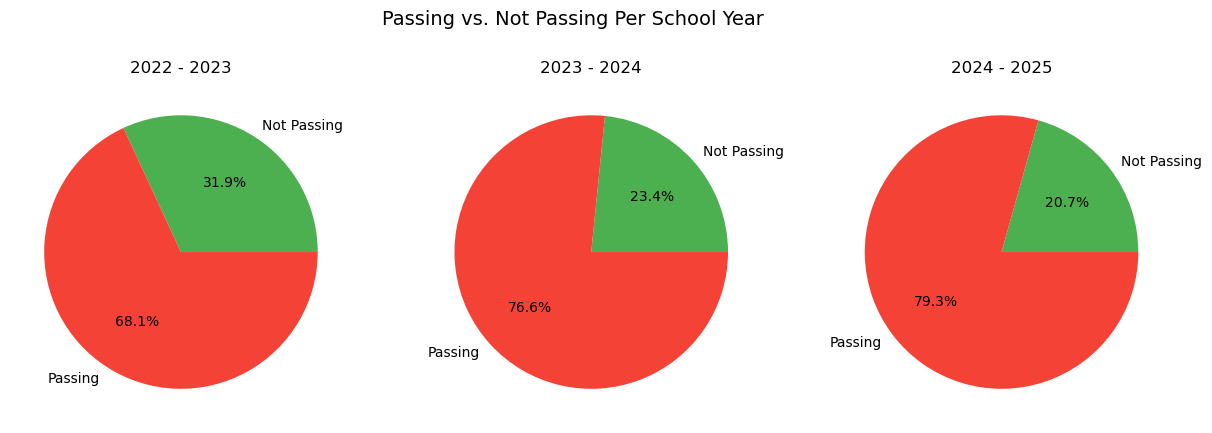

In [12]:
# Create a single figure with multiple pie charts for overall passing vs. not passing per school year
num_years = len(school_summary)
fig, axes = plt.subplots(1, num_years, figsize=(5 * num_years, 5))

if num_years == 1:
    axes = [axes]  # Ensure axes is iterable when there's only one year

for ax, (year, counts) in zip(axes, school_summary.iterrows()):
    counts.plot(kind="pie", autopct='%1.1f%%', colors=["#4CAF50", "#F44336"], ax=ax)
    ax.set_title(f"{year}")
    ax.set_ylabel("")  # Remove y-label for aesthetics

plt.suptitle("Passing vs. Not Passing Per School Year", fontsize=14)
plt.show()

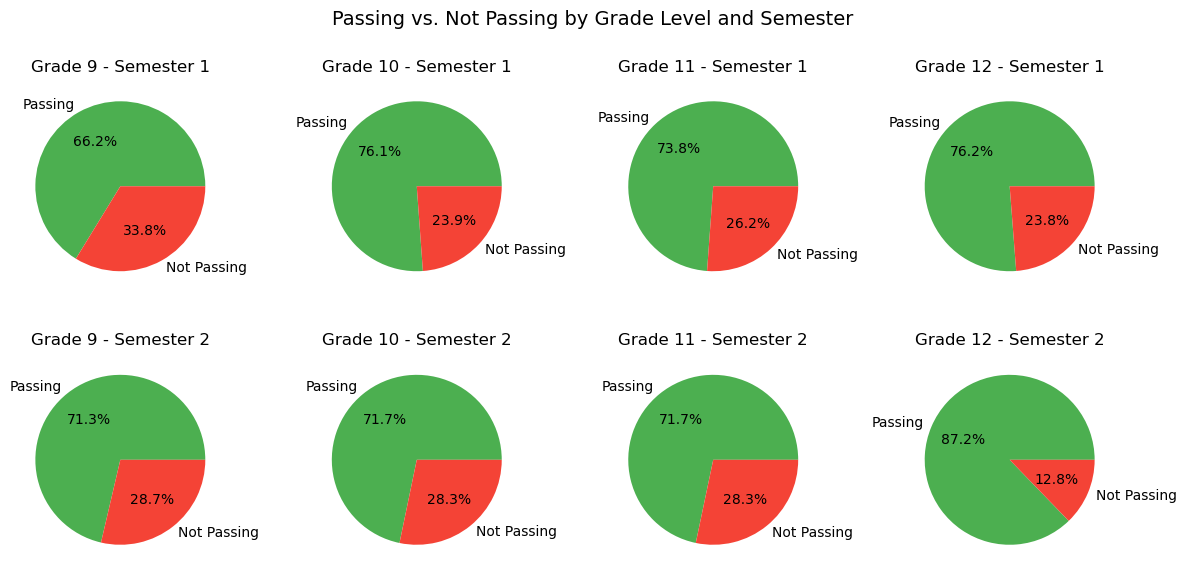

In [13]:
# Unique grades and semesters
grades = sorted(df["Grade"].unique())
semesters = ["Semester 1 Status", "Semester 2 Status"]

# Create a grid of subplots
fig, axes = plt.subplots(len(semesters), len(grades), figsize=(3 * len(grades), 6))

for row, semester in enumerate(semesters):
    for col, grade in enumerate(grades):
        temp_df = df_long[(df_long["Grade"] == grade) & (df_long["Semester"] == semester)]
        grade_counts = temp_df["Status"].value_counts()

        ax = axes[row, col]
        grade_counts.plot(kind="pie", autopct='%1.1f%%', colors=["#4CAF50", "#F44336"], ax=ax)
        ax.set_title(f"Grade {grade} - {semester.replace(' Status', '')}")  # Improved title formatting
        ax.set_ylabel("")  # Remove y-label for aesthetics

# Add a main title
plt.suptitle("Passing vs. Not Passing by Grade Level and Semester", fontsize=14)
plt.tight_layout()
plt.show()

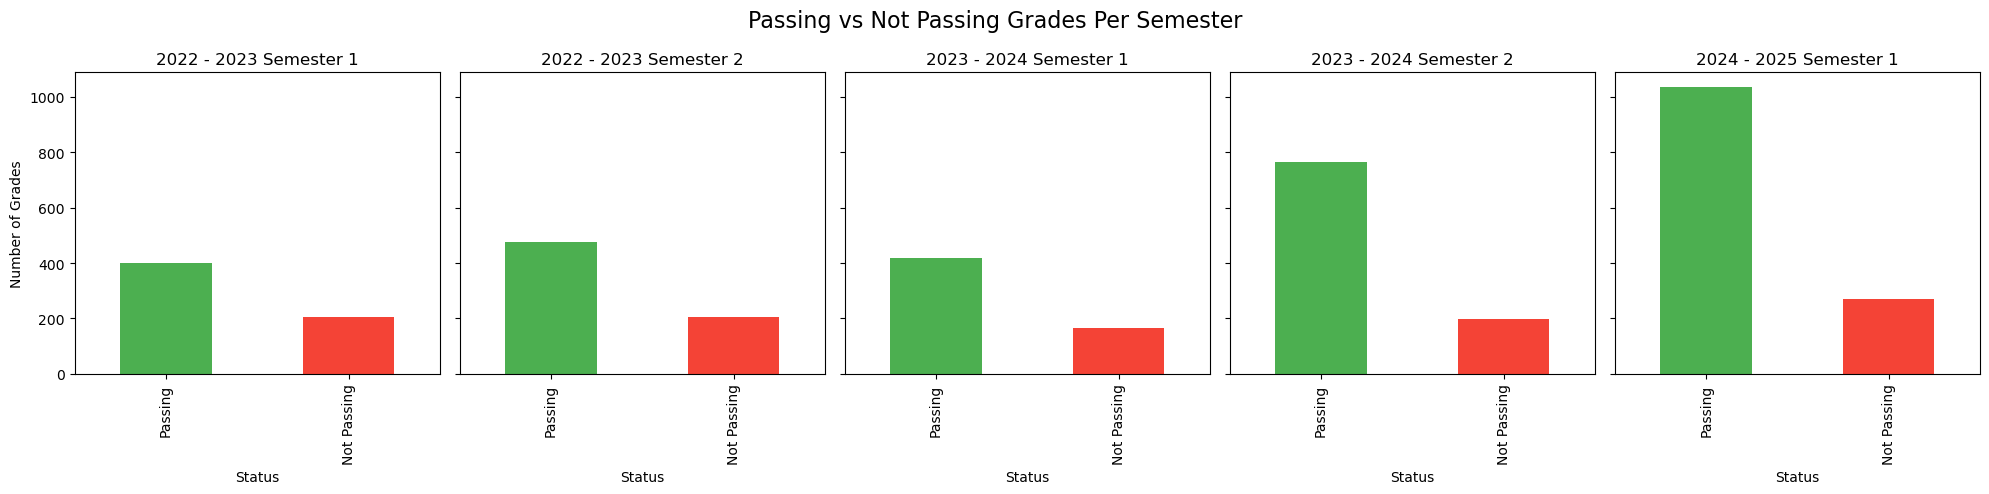

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for the specific semesters you want
selected_semesters = [
    ("2022 - 2023", "Semester 1 Status"),
    ("2022 - 2023", "Semester 2 Status"),
    ("2023 - 2024", "Semester 1 Status"),
    ("2023 - 2024", "Semester 2 Status"),
    ("2024 - 2025", "Semester 1 Status"),
]

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

for ax, (year, semester) in zip(axes, selected_semesters):
    temp_df = df_long[(df_long["School Year"] == year) & (df_long["Semester"] == semester)]
    grade_counts = temp_df["Status"].value_counts()

    grade_counts.plot(kind="bar", color=["#4CAF50", "#F44336"], ax=ax)
    ax.set_title(f"{year} {semester.replace(' Status', '')}")
    ax.set_ylabel("Number of Grades")

# Main title
plt.suptitle("Passing vs Not Passing Grades Per Semester", fontsize=16)
plt.tight_layout()
plt.show()


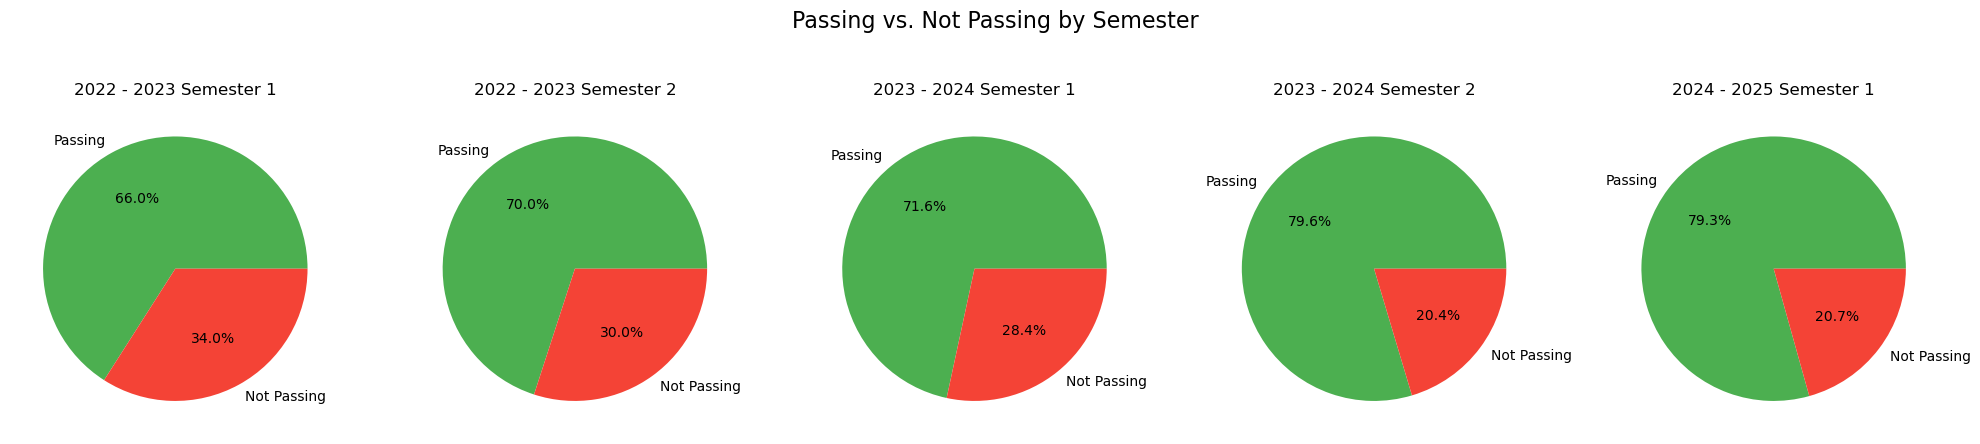

In [15]:
# Create subplots for pie charts
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for ax, (year, semester) in zip(axes, selected_semesters):
    temp_df = df_long[(df_long["School Year"] == year) & (df_long["Semester"] == semester)]
    grade_counts = temp_df["Status"].value_counts()

    grade_counts.plot(kind="pie", autopct='%1.1f%%', colors=["#4CAF50", "#F44336"], ax=ax)
    ax.set_title(f"{year} {semester.replace(' Status', '')}")
    ax.set_ylabel("")  # Remove y-label for aesthetics

# Main title
plt.suptitle("Passing vs. Not Passing by Semester", fontsize=16)
plt.tight_layout()
plt.show()

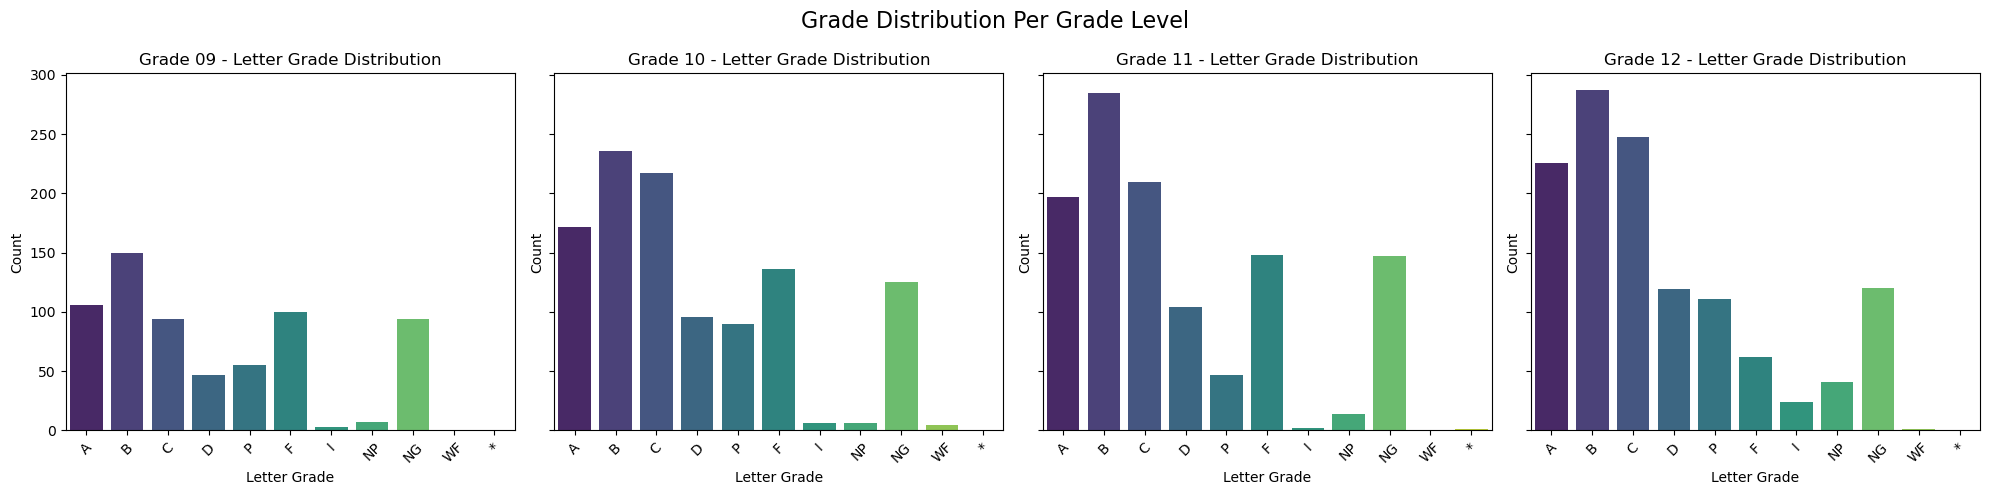

In [16]:
# Convert Grade column to string (if stored as integers)
df["Grade"] = df["Grade"].astype(str).str.zfill(2)  # Ensures '9' → '09', '10' → '10'

# Reshape data for visualization
df_long_grades = df.melt(id_vars=["Grade", "School Year"], 
                          value_vars=["Semester 1", "Semester 2"], 
                          var_name="Semester", value_name="Letter Grade")

# Drop NaN grades (students who didn't take a class that semester)
df_long_grades = df_long_grades.dropna(subset=["Letter Grade"])

# Define grade order for consistent sorting
grade_order = ['A', 'B', 'C', 'D', 'P', 'F', 'I', 'NP', 'NG', 'WF', '*']

# Convert Grade to string in case it's numerical
grade_levels = ["09", "10", "11", "12"]

# Create subplots
fig, axes = plt.subplots(1, len(grade_levels), figsize=(20, 5), sharey=True)

for ax, grade in zip(axes, grade_levels):
    temp_df = df_long_grades[df_long_grades["Grade"] == grade]

    if not temp_df.empty:  # Check if data exists for this grade
        sns.countplot(data=temp_df, x="Letter Grade", order=grade_order, palette="viridis", ax=ax)
        ax.set_title(f"Grade {grade} - Letter Grade Distribution")
        ax.set_xlabel("Letter Grade")
        ax.set_ylabel("Count")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    else:
        ax.set_title(f"Grade {grade} - No Data")
        ax.axis("off")  # Hide empty plots

# Main title
plt.suptitle("Grade Distribution Per Grade Level", fontsize=16)
plt.tight_layout()
plt.show()

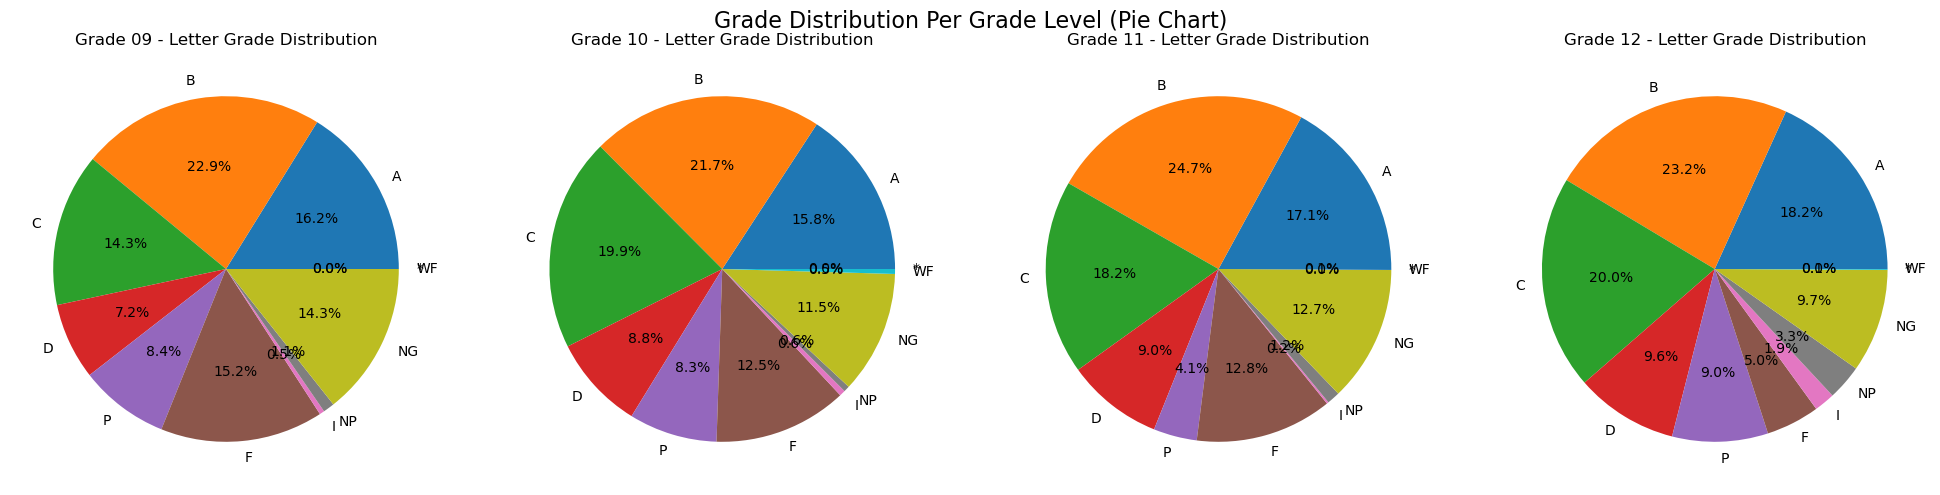

In [17]:
# Define grade levels and grade order
grade_levels = ["09", "10", "11", "12"]
grade_order = ['A', 'B', 'C', 'D', 'P', 'F', 'I', 'NP', 'NG', 'WF', '*']

# Generate a distinct color palette
colors = sns.color_palette("tab10", len(grade_order))  # "tab10" gives distinct colors

# Create subplots for each grade level
fig, axes = plt.subplots(1, len(grade_levels), figsize=(20, 5))

for ax, grade in zip(axes, grade_levels):
    temp_df = df_long_grades[df_long_grades["Grade"] == grade]
    
    if not temp_df.empty:
        # Count occurrences of each grade
        grade_counts = temp_df["Letter Grade"].value_counts().reindex(grade_order, fill_value=0)
        
        # Plot pie chart with distinct colors
        ax.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', colors=colors)
        ax.set_title(f"Grade {grade} - Letter Grade Distribution")
    else:
        ax.set_title(f"Grade {grade} - No Data")
        ax.axis("off")  # Hide empty plots

# Main title
plt.suptitle("Grade Distribution Per Grade Level (Pie Chart)", fontsize=16)
plt.tight_layout()
plt.show()

/tmp/ipykernel_1097/998741302.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Grade Status'] = temp_df['Letter Grade'].apply(
/tmp/ipykernel_1097/998741302.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Grade Status'] = temp_df['Letter Grade'].apply(
/tmp/ipykernel_1097/998741302.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

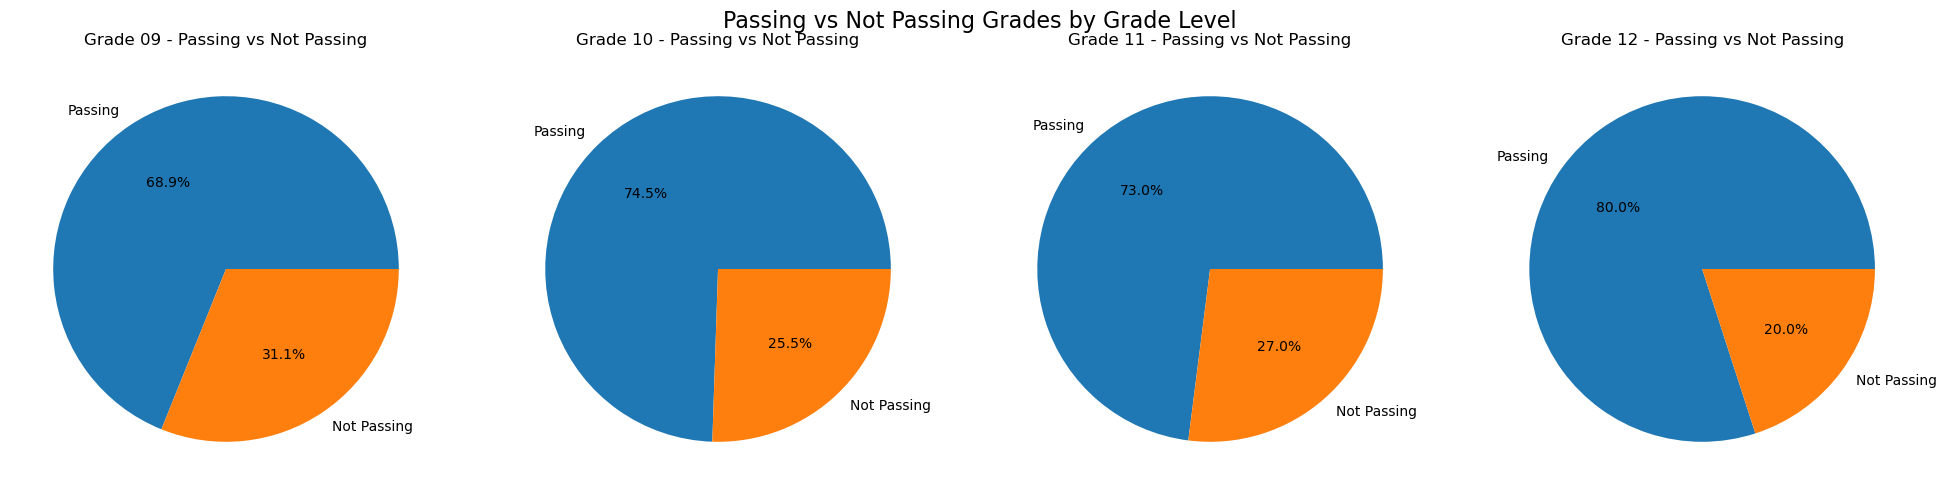

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define grade levels and grade order
grade_levels = ["09", "10", "11", "12"]
passing_grades = {'A', 'B', 'C', 'D', 'P'}
not_passing_grades = {'F', 'I', 'NP', 'NG', 'WF', '*'}

# Generate a distinct color palette
colors = sns.color_palette("tab10", 2)  # Two categories: Passing and Not Passing

# Create subplots for each grade level
fig, axes = plt.subplots(1, len(grade_levels), figsize=(20, 5))

for ax, grade in zip(axes, grade_levels):
    temp_df = df_long_grades[df_long_grades["Grade"] == grade]
    
    if not temp_df.empty:
        # Classify grades into Passing or Not Passing
        temp_df['Grade Status'] = temp_df['Letter Grade'].apply(
            lambda x: 'Passing' if x in passing_grades else ('Not Passing' if x in not_passing_grades else 'Unknown')
        )
        
        # Remove any "Unknown" grades (NaN or invalid grades)
        grade_counts = temp_df[temp_df['Grade Status'] != 'Unknown']['Grade Status'].value_counts()

        # Plot pie chart with distinct colors
        ax.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', colors=colors)
        ax.set_title(f"Grade {grade} - Passing vs Not Passing")
    else:
        ax.set_title(f"Grade {grade} - No Data")
        ax.axis("off")  # Hide empty plots

# Main title
plt.suptitle("Passing vs Not Passing Grades by Grade Level", fontsize=16)
plt.tight_layout()
plt.show()

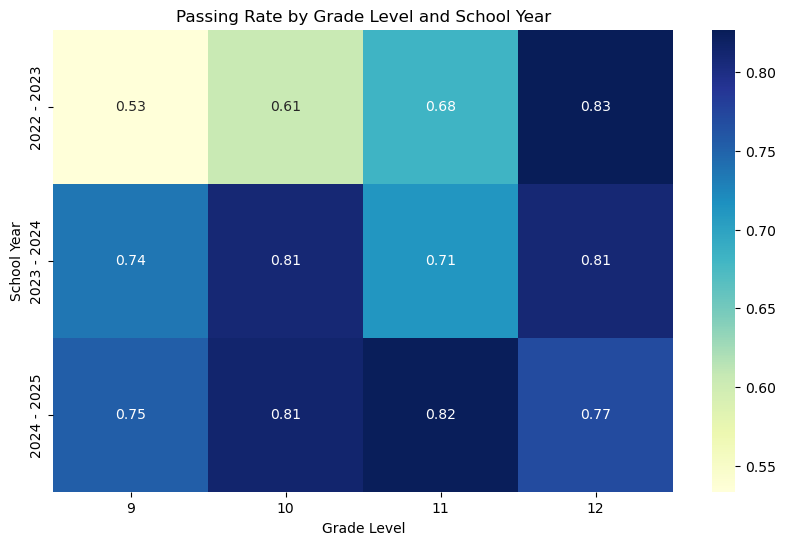

In [19]:
# Calculate passing rate per grade level per school year
passing_rate = df_long.groupby(["School Year", "Grade"])["Status"].apply(lambda x: (x == "Passing").mean()).unstack()

# Plot heatmap of passing rate
plt.figure(figsize=(10, 6))
sns.heatmap(passing_rate, annot=True, cmap="YlGnBu", cbar=True)
plt.title("Passing Rate by Grade Level and School Year")
plt.xlabel("Grade Level")
plt.ylabel("School Year")
plt.show()

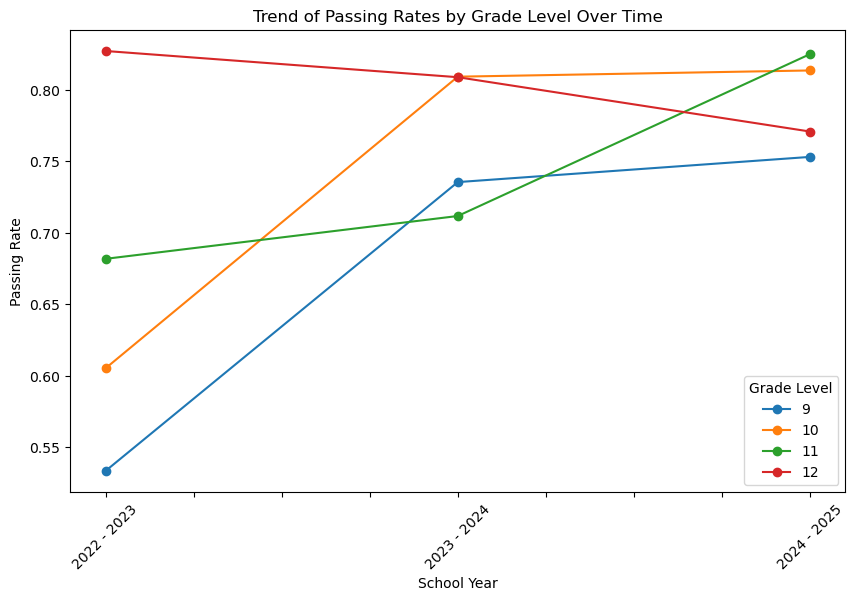

In [20]:
# Calculate passing rate over time (across school years)
passing_rate_over_time = df_long.groupby(["School Year", "Grade"])["Status"].apply(lambda x: (x == "Passing").mean()).unstack()

# Plot the trend of passing rates over time for each grade level
passing_rate_over_time.plot(kind="line", marker="o", figsize=(10, 6))
plt.title("Trend of Passing Rates by Grade Level Over Time")
plt.ylabel("Passing Rate")
plt.xlabel("School Year")
plt.legend(title="Grade Level")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [21]:
# Define the order of grades
grade_order = ['A', 'B', 'C', 'D', 'P', 'F', 'I', 'NP', 'NG', 'WF', '*']

# Filter for Semester 1 of the 2024 - 2025 school year
semester_1_2024_2025 = df_long_grades[(df_long_grades["School Year"] == "2024 - 2025") & 
                                       (df_long_grades["Semester"] == "Semester 1")]

# Count the distribution of grades, ordered by grade
grade_distribution = semester_1_2024_2025["Letter Grade"].value_counts().reindex(grade_order, fill_value=0)

# Display the ordered distribution
print(grade_distribution)

Letter Grade
A     192
B     344
C     273
D     108
P     120
F       7
I      11
NP     63
NG    187
WF      1
*       1
Name: count, dtype: int64
